RED WINE QUALITY PREDICTION


1. Project description

Red wine is a type of wine made from dark-colored grape varieties. The color of the wine can range from intense violet,typical of young wines,through to brich red for mature wines and brown for older red wine.Much of the red wine production processes involves extraction of color and flavour components from the grapes skin.

This project involves the analysis and classification of Portuguese "Vinho Verde" wine based on its physicochemical properties and sensory data. The dataset contains 11 input variables and one output variable representing the quality score of the wine.

The aim of the project is to build a classification model that can predict the quality of the wine based on its physicochemical properties. The classes of wine quality are ordered and unbalanced, so it will be important to explore feature selection methods to identify the most important variables for predicting wine quality. This can help improve the accuracy of the classification model by reducing the number of irrelevant variables and focusing on the most important ones.

To achieve this goal, the project involves several steps, including data exploration and visualization, data preprocessing, feature selection, model building, and evaluation. Different machine learning algorithms will be explored and compared to determine the best-performing model for predicting wine quality.


1.1 # Importing Important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.2 #Importing Dataset 

In [2]:
df = pd.read_csv("red_wine.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
df.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Checking the dimension of the dataset
df.shape

(1599, 12)

This dataset contains 1599 rows and 12 columns.Out of which 1 is target and remaining 11 are independent variables.

1.3 # Exploratory Data Analysis (EDA)

In [6]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

There are three different types of data (int64,float,and object)present in dataset.

In [8]:
# check for negative values
df.lt(0).sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df['quality'].dtype

dtype('int64')

<AxesSubplot:>

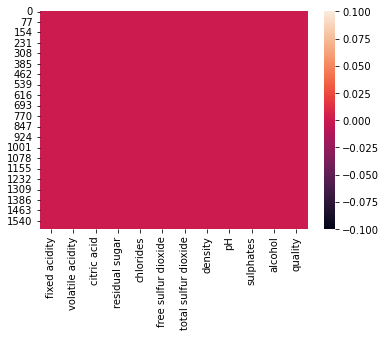

In [12]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

There is no missing data present

In [13]:
# checking value count for each columns
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print('\n')

Column: fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64


Column: volatile acidity
0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64


Column: citric acid
0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64


Column: residual sugar
2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64


Column: chlorides
0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: 

In [14]:
# loop through each column and print unique values
for col in df.columns:
    print(f"Unique values in {col}:")
    print(df[col].unique())

Unique values in fixed acidity:
[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  9.8 13.4 10.7 11.9 12.4 12.2 13.8
  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.   6.5
 12.9 14.3 15.5 11.7 13.2 15.9 12.1  5.1  4.9  5.9  6.   5.5]
Unique values in volatile acidity:
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04  0.715
 0.415 0.34  0.68  0.95  0.53  0.64  0.885 0.805 0.73  0.37  0.835 1.09
 0.57  0.44 

Description of dataset

In [15]:
# Statistical summary of columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The summary of the datasets looks fine as there is no missing values and negative values present.This is the statistical presentation of dataset. 

The columns are described as follows:
count: the number of non-null values in each column.
mean: the arithmetic mean of each column.
std: the standard deviation of each column.
min: the minimum value of each column.
25%: the 25th percentile of each column.
50%: the median (50th percentile) of each column.
75%: the 75th percentile of each column.
max: the maximum value of each column.

This table gives an idea about the distribution of values in each column, as well as the spread of data around the mean.

Graphical Analysis- Data visualization

Univariate Analysis

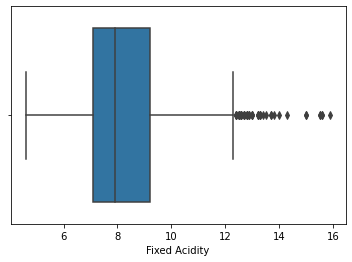

In [16]:
# visualize the fixed acidity of wine and checking the outliers
sns.boxplot(x=df['fixed acidity'])
plt.xlabel('Fixed Acidity')
plt.show()

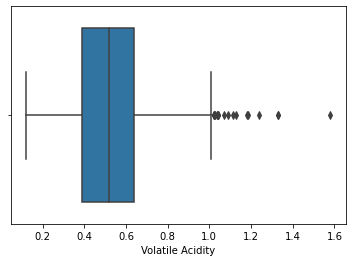

In [17]:
sns.boxplot(x=df['volatile acidity'])
plt.xlabel('Volatile Acidity')
plt.show()

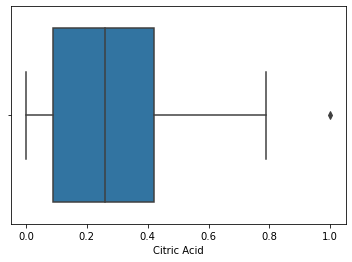

In [18]:
sns.boxplot(x=df['citric acid'])
plt.xlabel('Citric Acid')
plt.show()

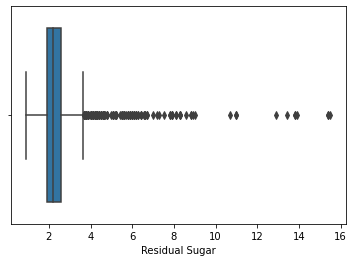

In [19]:
sns.boxplot(x=df['residual sugar'])
plt.xlabel('Residual Sugar')
plt.show()

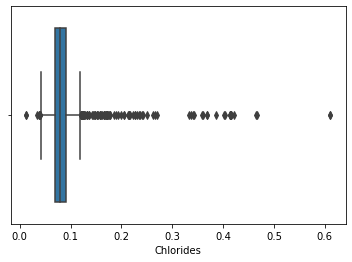

In [20]:
sns.boxplot(x=df['chlorides'])
plt.xlabel('Chlorides')
plt.show()

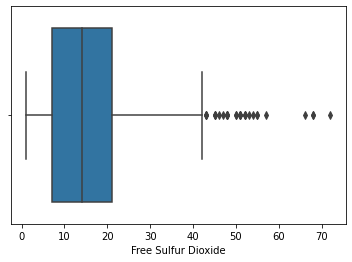

In [21]:
sns.boxplot(x=df['free sulfur dioxide'])
plt.xlabel('Free Sulfur Dioxide')
plt.show()

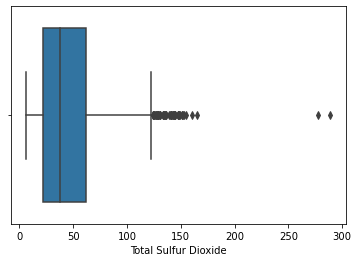

In [22]:
sns.boxplot(x=df['total sulfur dioxide'])
plt.xlabel('Total Sulfur Dioxide')
plt.show()

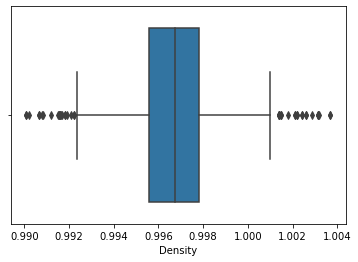

In [23]:
sns.boxplot(x=df['density'])
plt.xlabel('Density')
plt.show()

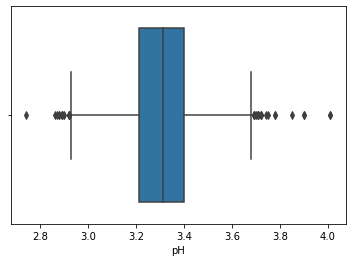

In [24]:
sns.boxplot(x=df['pH'])
plt.xlabel('pH')
plt.show()

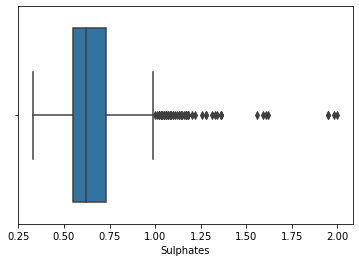

In [25]:
sns.boxplot(x=df['sulphates'])
plt.xlabel('Sulphates')
plt.show()

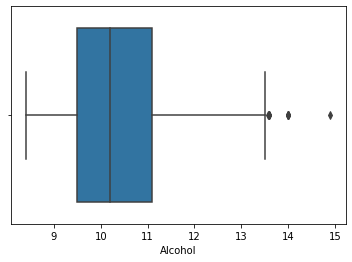

In [26]:
sns.boxplot(x=df['alcohol'])
plt.xlabel('Alcohol')
plt.show()

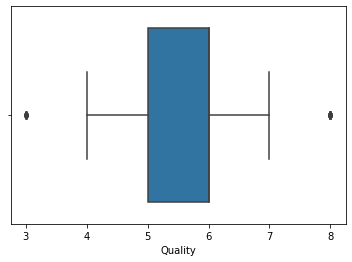

In [27]:
sns.boxplot(x=df['quality'])
plt.xlabel('Quality')
plt.show()

from the above boxplots , we can see the outliers present in each column. 

Lets proceed with other univariate analysis for further visualization using histogram.
Histograms are useful for visualizing the distribution of a variable, including the frequency and shape of the data, but they may not always reveal the presence of outliers or unusual values.


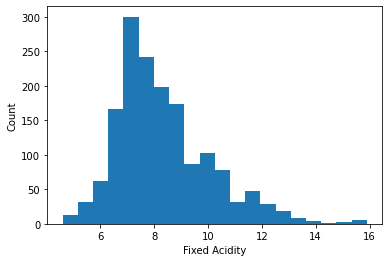

In [28]:
plt.hist(df['fixed acidity'], bins=20)
plt.xlabel('Fixed Acidity')
plt.ylabel('Count')
plt.show()

here in this plot we can see that fixed acidity column have skewness(positive)

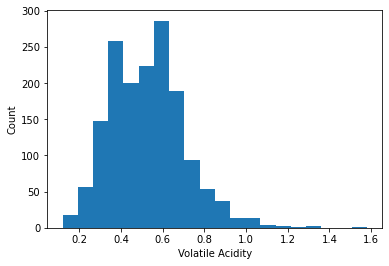

In [29]:
plt.hist(df['volatile acidity'], bins=20)
plt.xlabel('Volatile Acidity')
plt.ylabel('Count')
plt.show()

here we can see positive skewness in the volatile acidity too

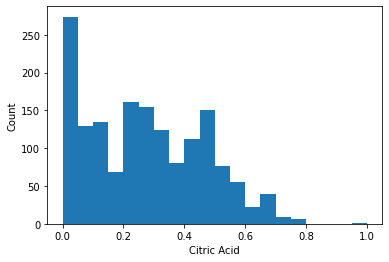

In [30]:
plt.hist(df['citric acid'], bins=20)
plt.xlabel('Citric Acid')
plt.ylabel('Count')
plt.show()

here also we can see highly skewed plot.

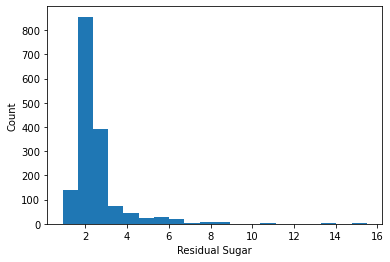

In [31]:
plt.hist(df['residual sugar'], bins=20)
plt.xlabel('Residual Sugar')
plt.ylabel('Count')
plt.show()

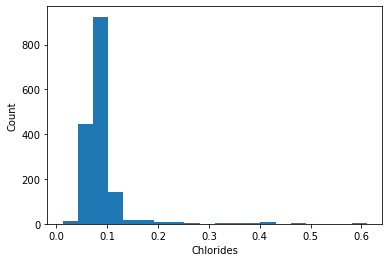

In [32]:
plt.hist(df['chlorides'], bins=20)
plt.xlabel('Chlorides')
plt.ylabel('Count')
plt.show()

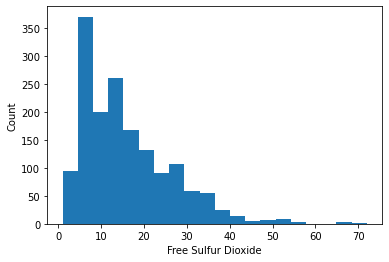

In [33]:
plt.hist(df['free sulfur dioxide'], bins=20)
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Count')
plt.show()

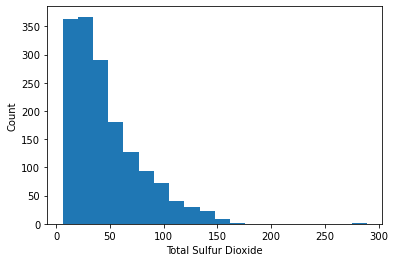

In [34]:
plt.hist(df['total sulfur dioxide'], bins=20)
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Count')
plt.show()

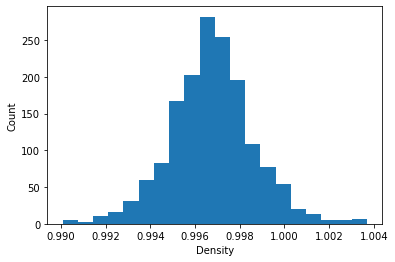

In [35]:
plt.hist(df['density'], bins=20)
plt.xlabel('Density')
plt.ylabel('Count')
plt.show()

here in this plot we cann see the data is normally distributed

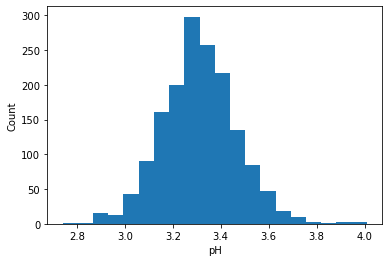

In [36]:
plt.hist(df['pH'], bins=20)
plt.xlabel('pH')
plt.ylabel('Count')
plt.show()

Here in this plot, we can see the data is normally distributed

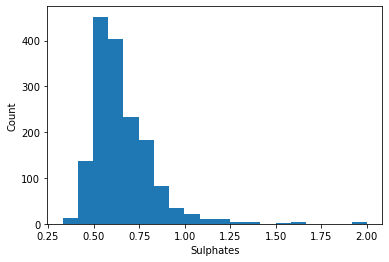

In [37]:
plt.hist(df['sulphates'], bins=20)
plt.xlabel('Sulphates')
plt.ylabel('Count')
plt.show()

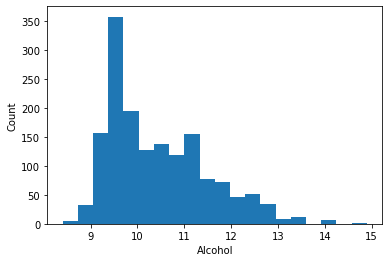

In [38]:
plt.hist(df['alcohol'], bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

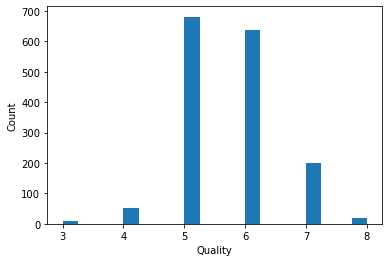

In [39]:
plt.hist(df['quality'], bins=20)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

In above plots,we can see except density and ph every plot shows the skeweness in the data

Bivariate Analysis

Here in Bivariate analysis, we can examine the relationship between two variables. This can help us to understand which input variables are most strongly associated with the output variable and potentially identify any patterns or trends in the data.


First we will analize the relation between target variable and all the input variables.

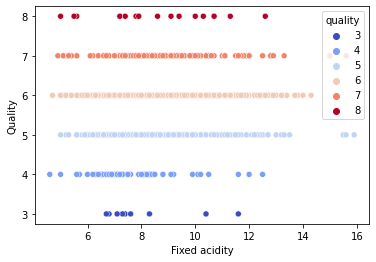

In [40]:
# comparing fixed acidity and quality
sns.scatterplot(data=df, x='fixed acidity', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Fixed acidity')
plt.ylabel('Quality')
plt.show()

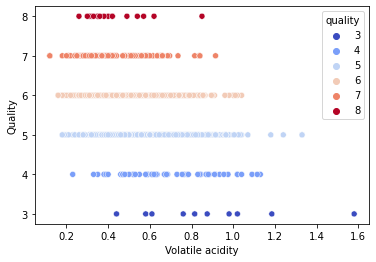

In [41]:
sns.scatterplot(data=df, x='volatile acidity', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Volatile acidity')
plt.ylabel('Quality')
plt.show()

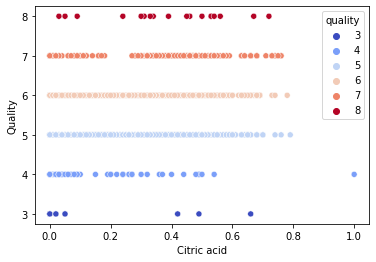

In [42]:
sns.scatterplot(data=df, x='citric acid', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Citric acid')
plt.ylabel('Quality')
plt.show()

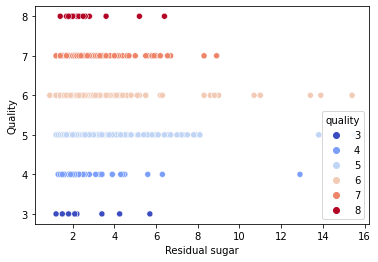

In [43]:
sns.scatterplot(data=df, x='residual sugar', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Residual sugar')
plt.ylabel('Quality')
plt.show()

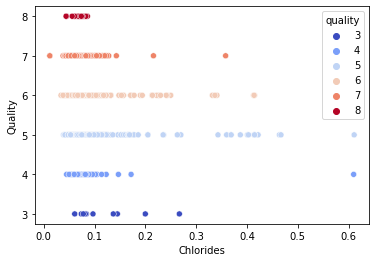

In [44]:
sns.scatterplot(data=df, x='chlorides', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Chlorides')
plt.ylabel('Quality')
plt.show()

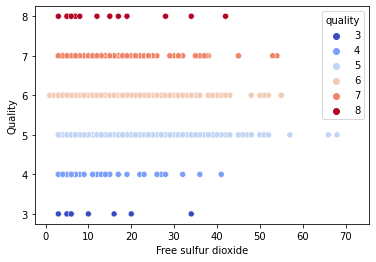

In [45]:
sns.scatterplot(data=df, x='free sulfur dioxide', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Free sulfur dioxide')
plt.ylabel('Quality')
plt.show()

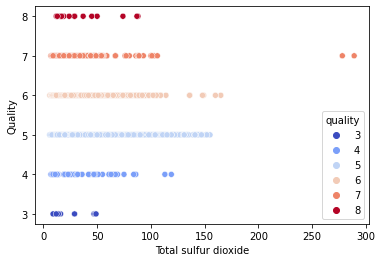

In [46]:
sns.scatterplot(data=df, x='total sulfur dioxide', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Total sulfur dioxide')
plt.ylabel('Quality')
plt.show()

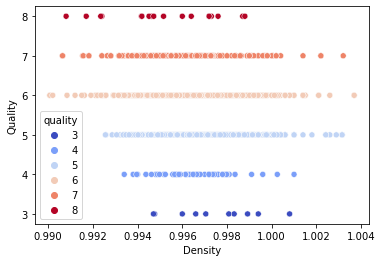

In [47]:
sns.scatterplot(data=df, x='density', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Density')
plt.ylabel('Quality')
plt.show()

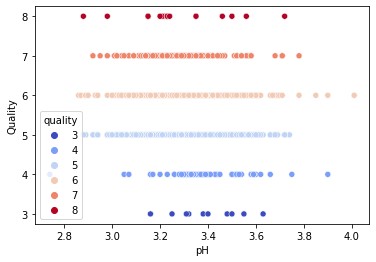

In [48]:
sns.scatterplot(data=df, x='pH', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

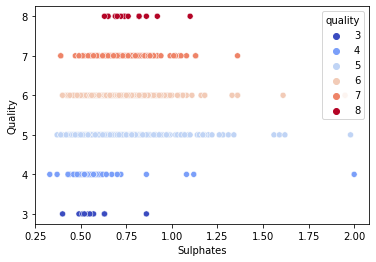

In [49]:
sns.scatterplot(data=df, x='sulphates', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Sulphates')
plt.ylabel('Quality')
plt.show()

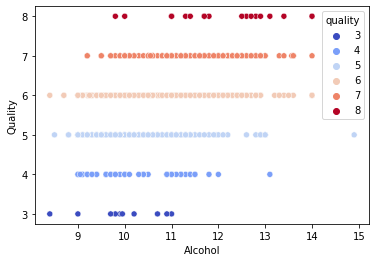

In [50]:
sns.scatterplot(data=df, x='alcohol', y='quality', hue='quality', palette='coolwarm')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

While checking relation of target variable with each of input variable via scatter plot we will see null correlation between them


Lets check the relation between different input variables

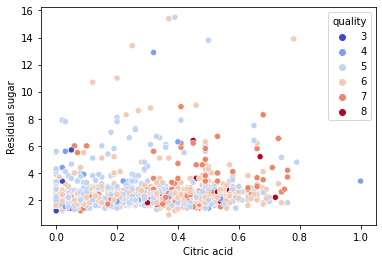

In [51]:
sns.scatterplot(data=df, x='citric acid', y='residual sugar', hue='quality', palette='coolwarm')
plt.xlabel('Citric acid')
plt.ylabel('Residual sugar')
plt.show()


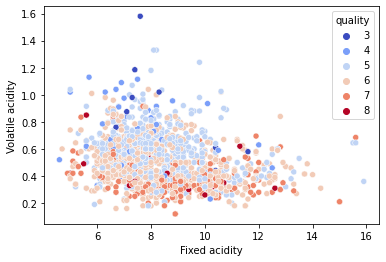

In [52]:
sns.scatterplot(data=df, x='fixed acidity', y='volatile acidity', hue='quality', palette= 'coolwarm')
plt.xlabel('Fixed acidity')
plt.ylabel('Volatile acidity')
plt.show()

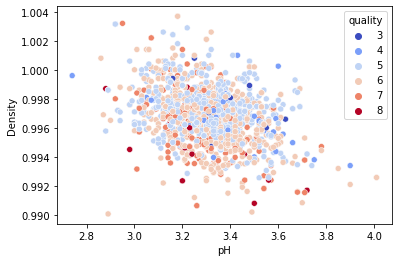

In [53]:
sns.scatterplot(data=df, x='pH', y='density', hue='quality',palette= 'coolwarm')
plt.xlabel('pH')
plt.ylabel('Density')
plt.show()

Here in these plots we can see there is correlation between the variable but their is outliers present 


Lets visualize by bar plot now for broad picture

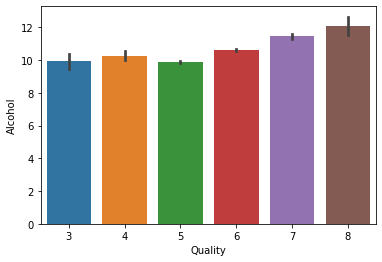

In [54]:
sns.barplot(data=df, x='quality', y='alcohol')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

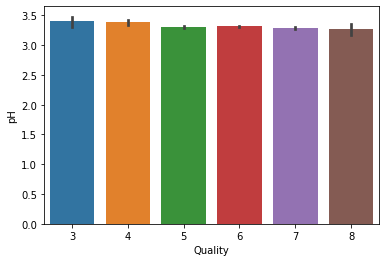

In [55]:
sns.barplot(data=df, x='quality', y='pH')
plt.xlabel('Quality')
plt.ylabel('pH')
plt.show()

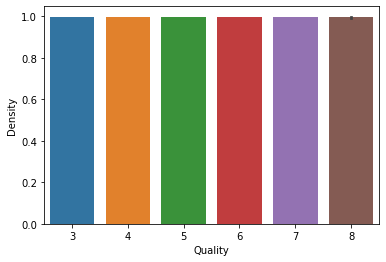

In [56]:
sns.barplot(data=df, x='quality', y='density')
plt.xlabel('Quality')
plt.ylabel('Density')
plt.show()

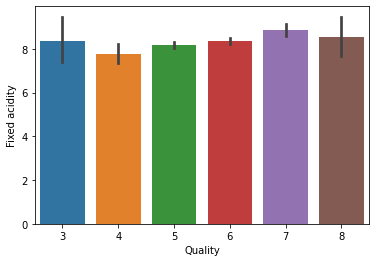

In [57]:
sns.barplot(data=df, x='quality', y='fixed acidity')
plt.xlabel('Quality')
plt.ylabel('Fixed acidity')
plt.show()

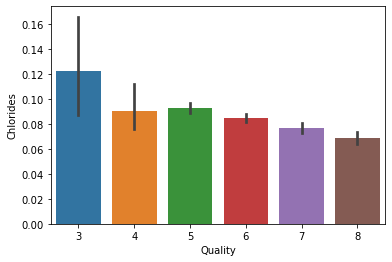

In [58]:
sns.barplot(data=df, x='quality', y='chlorides')
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

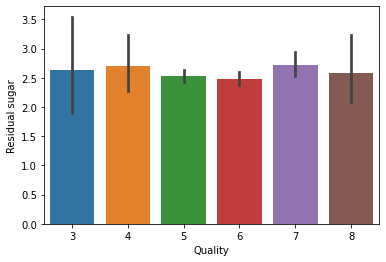

In [59]:
sns.barplot(data=df, x='quality', y='residual sugar')
plt.xlabel('Quality')
plt.ylabel('Residual sugar')
plt.show()

Here with this bar plot we can compare the average or distribution of the target variable (in this case, wine quality) across different levels of an independent variable (such as pH, alcohol, density, acidity etc.). It can help to identify which levels of the independent variable tend to produce higher or lower quality wines, and to compare the importance of different variables in predicting wine quality.

Multivariate analysis

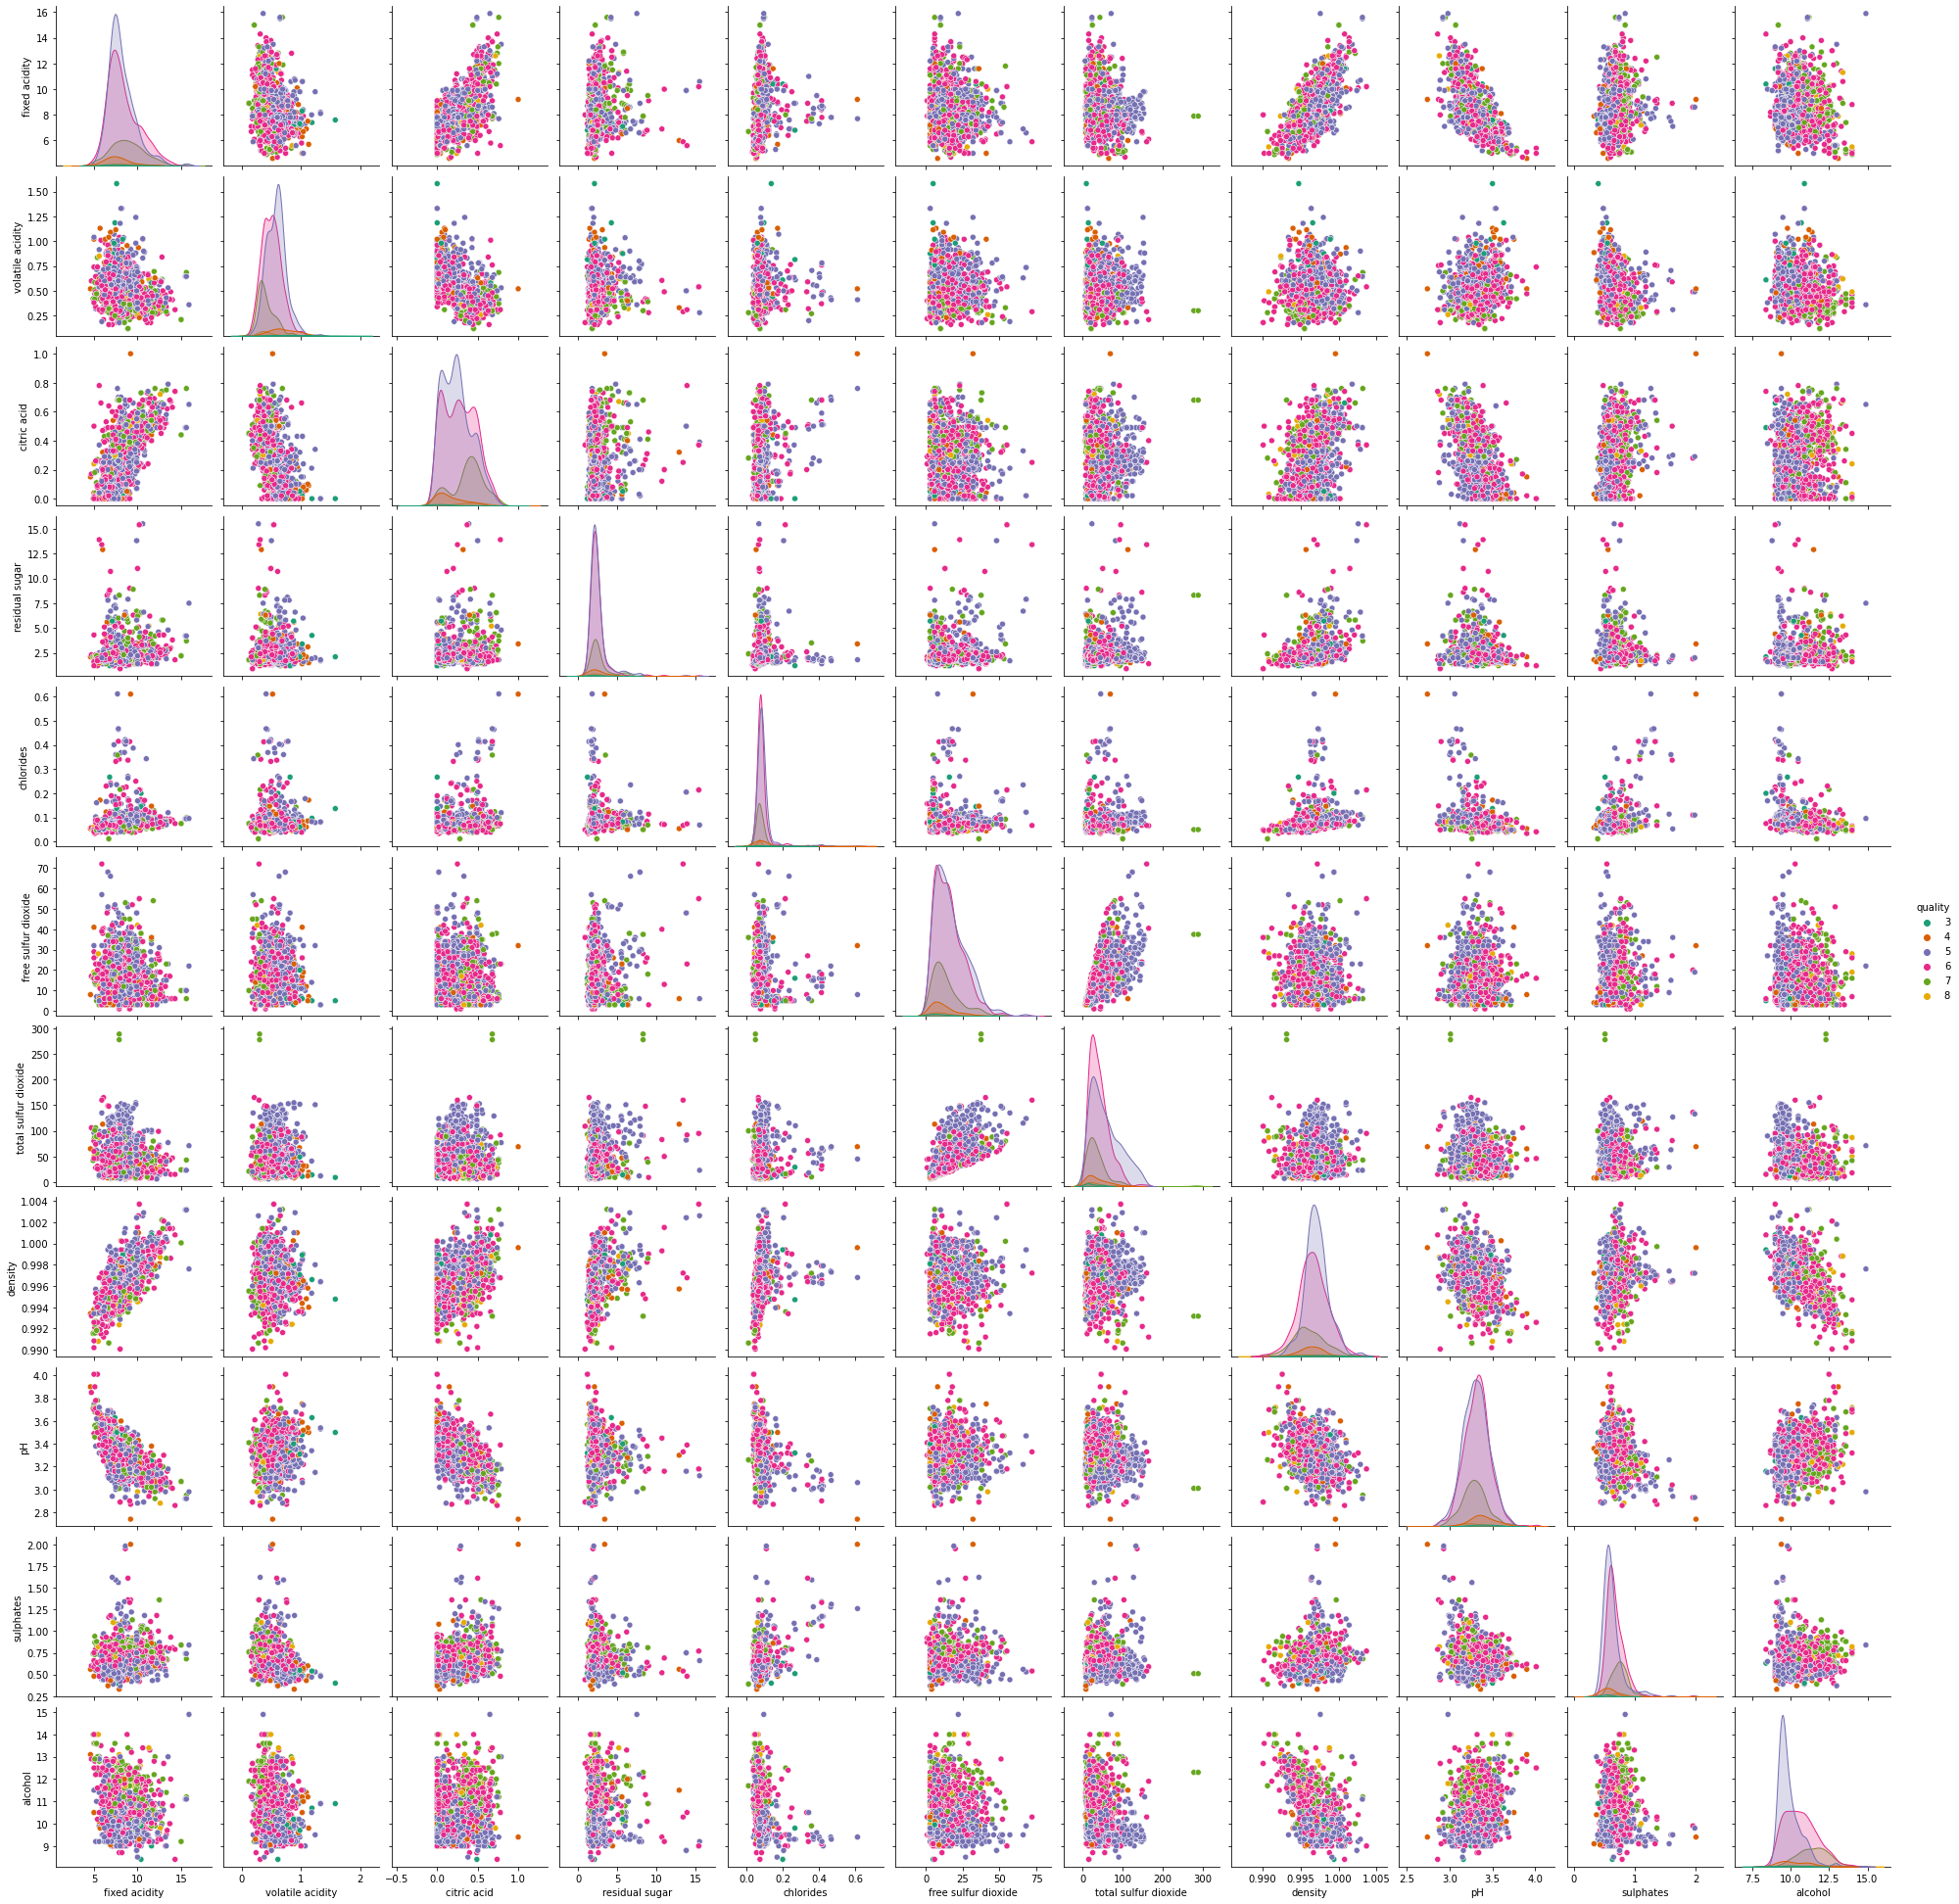

In [60]:
sns.pairplot(data=df, vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'], hue='quality', palette='Dark2')
plt.show()


1.In this plot, we will observe that pairplot gives the pairwise relation between the features on the basis of the target "quality"
2.There are outliers present in each variable.
3. Except pH and density every variables shows skewness.

In [61]:
# Remove outliers using the Z-score method
from scipy import stats
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]

# check if outliers are removed
print("Original number of rows:", 1599)
print("New number of rows:", df.shape[0])
print("Outliers removed:", 1599 - df.shape[0])

Original number of rows: 1599
New number of rows: 1451
Outliers removed: 148


In [62]:
df.shape

(1451, 12)

In [63]:
# Checking for Skewness
skewness= df.skew()
print(df.skew())

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64


Looking at the values we can see that, the variables "volatile acidity", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "sulphates" are positively skewed, while "fixed acidity", "citric acid", "density", "pH", "alcohol", and "quality" are approximately symmetric as their skewness values are close to zero.

In [64]:
from scipy.stats import yeojohnson

# Select the columns with high skewness
skewed_cols = df.skew()[abs(df.skew()) > 0.5].index

# Apply the Yeo-Johnson transformation to the selected columns
for col in skewed_cols:
    df[col], _ = yeojohnson(df[col])

# Print skewness values again
print(df.skew())

fixed acidity           0.018666
volatile acidity        0.380659
citric acid             0.291297
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                 0.055738
pH                      0.114705
sulphates               0.020799
alcohol                 0.114658
quality                 0.407865
dtype: float64


Correlation between target variable and independent variables

In [65]:
# Checking correlation
correlation = df.corr()
print(correlation)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.292334     0.677665   
volatile acidity          -0.292334          1.000000    -0.589452   
citric acid                0.677665         -0.589452     1.000000   
residual sugar             0.224213          0.034354     0.191806   
chlorides                  0.251981          0.086205     0.099713   
free sulfur dioxide       -0.164312          0.043394    -0.105215   
total sulfur dioxide      -0.092307          0.107090    -0.028507   
density                    0.661243         -0.004957     0.371729   
pH                        -0.728561          0.251343    -0.520311   
sulphates                  0.177325         -0.353881     0.308324   
alcohol                   -0.044681         -0.208950     0.161474   
quality                    0.131210         -0.353443     0.243999   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

The correlation matrix shows the pairwise correlations between all the variables in the dataset. The values range from -1 to 1, where 1 indicates a perfect positive correlation (as one variable increases, the other variable increases) and -1 indicates a perfect negative correlation (as one variable increases, the other variable decreases). A value of 0 indicates no correlation between the variables.

In this correlation matrix, we can see that some variables are positively correlated with each other those are,fixed acidity and citric acid, while others are negatively correlated, such as volatile acidity and quality. These correlations can give us insights into how the variables in the dataset relate to each other.

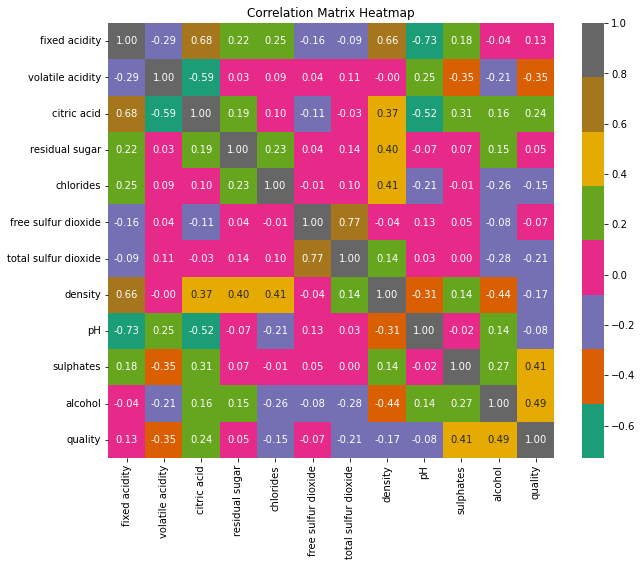

In [66]:
# visualizing the correlation between target variable and independent variables using heatmap
# set figure size
plt.figure(figsize=(10, 8))

corr_matrix = df.corr()
# plot heatmap with formatted annotations
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="Dark2")

plt.title("Correlation Matrix Heatmap")
plt.show()

In [67]:
# Define the features and target variables
X = df.drop('quality', axis=1)
y = df['quality']

In [153]:
print("Target variable name: ", y.name)
print("Target variable dimensions: ",y.shape)

print("\nFeatures variables names: ", X.columns)
print("Features variables dimensions: ", X.shape)

Target variable name:  quality_label
Target variable dimensions:  (1451,)

Features variables names:  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Features variables dimensions:  (1451, 11)


In [68]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()
# Apply RobustScaler to X
X = scaler.fit_transform(X)
# Convert the resulting numpy array into a pandas DataFrame
X = pd.DataFrame(X, columns=df.drop(['quality'], axis=1).columns)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.262910,0.750000,-0.757576,-0.509950,-0.162639,-0.151802,-0.056325,0.500000,1.111111,-0.392603,-0.607961
1,-0.050213,1.500000,-0.757576,0.490050,0.858420,0.641881,0.624491,0.045455,-0.611111,0.337121,-0.277700
2,-0.050213,1.000000,-0.636364,0.139565,0.616424,0.134031,0.405176,0.136364,-0.277778,0.174858,-0.277700
3,1.198595,-1.000000,0.939394,-0.509950,-0.218729,0.254244,0.511986,0.590909,-0.833333,-0.254898,-0.277700
4,-0.262910,0.750000,-0.757576,-0.509950,-0.162639,-0.151802,-0.056325,0.500000,1.111111,-0.392603,-0.607961
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.041358,0.333333,-0.515152,-0.322690,0.530180,0.903506,0.199329,-0.818182,0.777778,-0.254898,0.179772
1447,-1.277864,0.125000,-0.454545,0.000000,-1.042670,1.120730,0.347486,-0.718182,1.166667,0.716321,0.523712
1448,-0.966804,-0.041667,-0.363636,0.139565,-0.162639,0.797921,0.104354,-0.436364,0.611111,0.672770,0.434901
1449,-1.277864,0.520833,-0.393939,-0.322690,-0.218729,0.903506,0.199329,-0.559091,1.444444,0.487899,0.000000


In the wine quality dataset, there is outliers in all of the features, and robust scaling can help mitigate their impact on the analysis.Robust scaling uses the median and interquartile range, which are less sensitive to extreme values.

In [69]:
# Checking variance inflation factor[VIF]
from statsmodels.stats.outliers_influence import variance_inflation_factor

# calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# display results
print(vif_data)

                 feature       VIF
0          fixed acidity  6.592636
1       volatile acidity  1.820061
2            citric acid  2.969514
3         residual sugar  1.683692
4              chlorides  1.267273
5    free sulfur dioxide  2.820395
6   total sulfur dioxide  3.157649
7                density  5.430788
8                     pH  3.027371
9              sulphates  1.371617
10               alcohol  2.832064


In [70]:
# checking value count of target variable
y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

Here we can see that data is not balanced here. As it is a classification problem, so we need to balance it using oversampling method


Before that set a arbitary cutoff for target variable

In [71]:
# arbitary cutoff
df['quality_label'] = np.where(df['quality'] >= 7, 1, 0)
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.892415             0.700         0.00        0.435227   0.041431   
1          0.898041             0.880         0.00        0.455284   0.046209   
2          0.898041             0.760         0.04        0.448254   0.045077   
3          0.931072             0.280         0.56        0.435227   0.041169   
4          0.892415             0.700         0.00        0.435227   0.041431   
...             ...               ...          ...             ...        ...   
1594       0.871825             0.600         0.08        0.438983   0.044673   
1595       0.865570             0.550         0.10        0.445455   0.037313   
1596       0.873797             0.510         0.13        0.448254   0.041431   
1597       0.865570             0.645         0.12        0.438983   0.041169   
1598       0.867714             0.310         0.47        0.469539   0.038899   

      free sulfur dioxide  

In [72]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,0.892415,0.700,0.00,0.435227,0.041431,2.943864,3.799481,0.9978,3.51,0.240859,0.271944,5,0
1,0.898041,0.880,0.00,0.455284,0.046209,4.076388,4.566264,0.9968,3.20,0.257455,0.271950,5,0
2,0.898041,0.760,0.04,0.448254,0.045077,3.351725,4.319256,0.9970,3.26,0.253764,0.271950,5,0
3,0.931072,0.280,0.56,0.435227,0.041169,3.523259,4.439553,0.9980,3.16,0.243990,0.271950,6,0
4,0.892415,0.700,0.00,0.435227,0.041431,2.943864,3.799481,0.9978,3.51,0.240859,0.271944,5,0
5,0.892415,0.660,0.00,0.431057,0.041169,3.160473,3.980449,0.9978,3.51,0.240859,0.271944,5,0
6,0.899369,0.600,0.06,0.421208,0.039496,3.351725,4.420318,0.9964,3.30,0.222411,0.271944,5,0
7,0.890925,0.650,0.00,0.392724,0.038281,3.351725,3.274500,0.9946,3.39,0.224492,0.271953,7,1
8,0.898041,0.580,0.02,0.438983,0.040630,2.693327,3.110601,0.9968,3.36,0.242445,0.271945,7,1
9,0.893871,0.500,0.36,0.482469,0.040073,3.523259,5.055292,0.9978,3.35,0.269818,0.271959,5,0


In [73]:
df.tail(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
1583,0.871825,0.460,0.29,0.442377,0.040902,4.449707,5.008318,0.99578,3.33,0.249787,0.271950,5,0
1584,0.881177,0.320,0.44,0.450808,0.036979,4.016098,3.799481,0.99484,3.29,0.269818,0.271969,7,1
1585,0.889399,0.390,0.44,0.455284,0.038593,3.888962,4.185591,0.99494,3.30,0.273231,0.271968,6,0
1586,0.893871,0.310,0.41,0.450808,0.038281,4.543675,4.439553,0.99492,3.34,0.274038,0.271967,6,0
1587,0.863363,0.610,0.11,0.431057,0.038593,3.602903,3.585768,0.99483,3.55,0.255025,0.271963,6,0
1588,0.889399,0.660,0.33,0.453143,0.039200,4.543675,5.055292,0.99414,3.27,0.267992,0.271976,6,0
1590,0.873797,0.550,0.15,0.431057,0.041689,4.134700,3.831624,0.99314,3.32,0.271563,0.271969,6,0
1591,0.853853,0.740,0.09,0.426409,0.044466,3.439681,3.504947,0.99402,3.67,0.240859,0.271969,6,0
1592,0.873797,0.510,0.13,0.448254,0.041431,4.299045,3.980449,0.99574,3.42,0.265088,0.271964,6,0
1593,0.882905,0.620,0.08,0.435227,0.039200,4.245913,3.923135,0.99651,3.42,0.271563,0.271945,6,0


In [74]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

# Define X and y
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

# Initialize variables to store the best random state and f1 score
best_random_state = None
best_f1_score = 0

# Iterate over 100 different random states to find the best one
for random_state in range(100):
    # Split the data into train and test sets using the current random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_state)

    # Initialize a decision tree classifier with default hyperparameters
    clf = DecisionTreeClassifier()

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = clf.predict(X_test)

    # Calculate the f1 score for the predictions
    f1 = f1_score(y_test, y_pred)

    # If the current f1 score is better than the previous best score, update the best score and random state
    if f1 > best_f1_score:
        best_random_state = random_state
        best_f1_score = f1

# Print the best random state and f1 score
print("Best random state:", best_random_state)
print("Best f1 score:", best_f1_score)

Best random state: 81
Best f1 score: 0.6814814814814816


In [139]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=81)

In [140]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 11)
(436, 11)
(1015,)
(436,)


Oversampling

In [141]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [142]:
# Oversampling the data
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN()

# Fit and transform the training data
X_train, y_train = adasyn.fit_resample(X_train, y_train)

In [143]:
# Again check the value count of target variable
y.value_counts()

0    1250
1     201
Name: quality_label, dtype: int64

In [144]:
# use different oversampling technique to balance the data
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
smote = SMOTE(random_state=81)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the class distribution of the resampled data
print(y_train_resampled.value_counts())

0    889
1    889
Name: quality_label, dtype: int64


# Modelling

Classification Algorithms

In [80]:
# Import Necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression(LR)

In [81]:
# Checking accuracy of lr

# create logistic regression object
lr = LogisticRegression(random_state=81)

# fit the model to the training data
lr.fit(X_train, y_train)

# make predictions on the test data
predlr = lr.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, predlr)
print("Accuracy:", accuracy)

# generate classification report
report = classification_report(y_test, predlr)
print("Classification Report:\n", report)


Accuracy: 0.7041284403669725
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.70      0.80       371
           1       0.30      0.72      0.42        65

    accuracy                           0.70       436
   macro avg       0.62      0.71      0.61       436
weighted avg       0.84      0.70      0.74       436



Accuracy of this model is 70.4%

# Decision Tree Classifier (DTC)

In [82]:
# Checking accuracy of dtc

# Create Decision Tree object
dtc = DecisionTreeClassifier(random_state=81)

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8784403669724771
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       371
           1       0.57      0.71      0.63        65

    accuracy                           0.88       436
   macro avg       0.76      0.81      0.78       436
weighted avg       0.89      0.88      0.88       436



Accuracy of this model is 87.9%

# Random Forest Classifier(RFC)

In [83]:
# Checking accuracy of rfc

# create RFC object 
rfc = RandomForestClassifier(random_state=81)

# fit the model to the training data
rfc.fit(X_train, y_train)

# make predictions on the test data
y_pred = rfc.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8922018348623854
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       371
           1       0.60      0.80      0.69        65

    accuracy                           0.89       436
   macro avg       0.78      0.85      0.81       436
weighted avg       0.91      0.89      0.90       436



Accuracy of this model is 89.2%

# Support Vector Mechanism (SVC)

In [84]:
# Checking the accuracy of svc
from sklearn import svm

# Create a SVM classifier object 
svm_classifier = svm.SVC(random_state=81)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.7110091743119266
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.70      0.80       371
           1       0.31      0.77      0.44        65

    accuracy                           0.71       436
   macro avg       0.63      0.74      0.62       436
weighted avg       0.85      0.71      0.75       436



Accuracy of this model is 71.1%

# Naive Bayes(GaussianNB)

In [85]:
# Checking accuracy of GaussianNB

# create Gaussian Naive Bayes object
nb = GaussianNB()

# fit the model to the training data
nb.fit(X_train, y_train)

# make predictions on the test data
y_pred = nb.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.7614678899082569
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84       371
           1       0.37      0.82      0.50        65

    accuracy                           0.76       436
   macro avg       0.66      0.78      0.67       436
weighted avg       0.87      0.76      0.79       436



Accuracy of this model is 76.1%

# K-Nearest Neighbors(KNN)

In [86]:
# Checking the accuracy the knn
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=81)

# Create a KNN classifier object with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



Accuracy of this model is 97.8%

# Gradient Boost Classifier(GBC)

In [87]:
# Checking accuracy of gbc
# Import required libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=81)

# Create a GBC classifier object 
gbc = GradientBoostingClassifier(random_state=81)

# Fit the classifier to the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



Accuracy of this model is 97.8%

Cross Validation Score

In [88]:
from sklearn.model_selection import cross_val_score

# checking cv score for lr 
lr_cv = LogisticRegression()
lr_cv.fit(X_train, y_train)

lr_cv_score = cross_val_score(lr_cv, X_train, y_train, cv=5)
print("Cross Validation Score:", lr_cv_score)
print("Mean CV Score:", np.mean(lr_cv_score))

predlr_cv = lr_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predlr_cv))
print("Classification Report:\n", classification_report(y_test, predlr_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predlr_cv) - np.mean(lr_cv_score))


Cross Validation Score: [0.95238095 1.         0.95238095 0.9047619  0.95238095]
Mean CV Score: 0.9523809523809523
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Difference between accuracy score and cross-validation score is: 0.025396825396825418


In [89]:
# checking cv score for dtc

dtc_cv = DecisionTreeClassifier()
dtc_cv.fit(X_train, y_train)

dtc_cv_score = cross_val_score(dtc_cv, X_train, y_train, cv=5)
print("Cross Validation Scores:", dtc_cv_score)
print("Mean CV Score:", np.mean(dtc_cv_score))

preddtc_cv = dtc_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, preddtc_cv))
print("Classification Report:\n", classification_report(y_test, preddtc_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, preddtc_cv) - np.mean(dtc_cv_score))


Cross Validation Scores: [0.85714286 1.         1.         0.9047619  0.95238095]
Mean CV Score: 0.9428571428571428
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.94      0.94        16
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Difference between accuracy score and cross-validation score is: 0.012698412698412764


In [90]:
# checking cv score of rfc
rfc_cv = RandomForestClassifier()
rfc_cv.fit(X_train, y_train)

rfc_cv_score = cross_val_score(rfc_cv, X_train, y_train, cv=5)
print("Cross Validation Scores:", rfc_cv_score)
print("Mean CV Score:", np.mean(rfc_cv_score))

predrfc_cv = rfc_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predrfc_cv))
print("Classification Report:\n", classification_report(y_test, predrfc_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predrfc_cv) - np.mean(rfc_cv_score))


Cross Validation Scores: [0.9047619  1.         0.9047619  0.9047619  0.95238095]
Mean CV Score: 0.9333333333333332
Accuracy: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      0.94      0.94        16
           2       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Difference between accuracy score and cross-validation score is: 0.022222222222222365


In [91]:
# checking cv score of svc

svc = SVC()
svc.fit(X_train, y_train)

svc_cv_score = cross_val_score(svc, X_train, y_train, cv=5)
print("Cross Validation Scores:", svc_cv_score)
print("Mean CV Score:", np.mean(svc_cv_score))

predsvc_cv = svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predsvc_cv))
print("Classification Report:\n", classification_report(y_test, predsvc_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predsvc_cv) - np.mean(svc_cv_score))


Cross Validation Scores: [0.9047619  1.         0.9047619  0.9047619  0.95238095]
Mean CV Score: 0.9333333333333332
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Difference between accuracy score and cross-validation score is: 0.04444444444444451


In [92]:
# checking cv score of gaussianNB

# compute cross-validation scores
nb_cv_scores = cross_val_score(nb, X, y, cv=5)

print("Cross Validation Scores:", nb_cv_scores)
print("Mean CV Score:", np.mean(nb_cv_scores))

# fit and predict on the test set
nb.fit(X, y)
y_pred = nb.predict(X)

print("Accuracy:", accuracy_score(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y, y_pred) - np.mean(nb_cv_scores))


Cross Validation Scores: [0.87628866 0.66206897 0.86551724 0.83103448 0.85862069]
Mean CV Score: 0.8187060078208319
Accuracy: 0.8511371467953136
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      1250
           1       0.47      0.63      0.54       201

    accuracy                           0.85      1451
   macro avg       0.70      0.76      0.73      1451
weighted avg       0.87      0.85      0.86      1451

Difference between accuracy score and cross-validation score is: 0.03243113897448169


In [93]:
# checking the cv score of knn

knn_cv = KNeighborsClassifier()
knn_cv.fit(X_train, y_train)

knn_cv_score = cross_val_score(knn_cv, X_train, y_train, cv=5)
print("Cross Validation Scores:", knn_cv_score)
print("Mean CV Score:", np.mean(knn_cv_score))

pred_knn_cv = knn_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_knn_cv))
print("Classification Report:\n", classification_report(y_test, pred_knn_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, pred_knn_cv) - np.mean(knn_cv_score))


Cross Validation Scores: [0.9047619  1.         0.9047619  0.95238095 0.95238095]
Mean CV Score: 0.9428571428571428
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Difference between accuracy score and cross-validation score is: 0.03492063492063491


In [94]:
# checking the cv score of gbc

gbc_cv = GradientBoostingClassifier()
gbc_cv.fit(X_train, y_train)

gbc_cv_score = cross_val_score(gbc_cv, X_train, y_train, cv=5)
print("Cross Validation Scores:", gbc_cv_score)
print("Mean CV Score:", np.mean(gbc_cv_score))

predgbc_cv = gbc_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predgbc_cv))
print("Classification Report:\n", classification_report(y_test, predgbc_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predgbc_cv) - np.mean(gbc_cv_score))


Cross Validation Scores: [0.85714286 1.         0.95238095 0.9047619  0.95238095]
Mean CV Score: 0.9333333333333332
Accuracy: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Difference between accuracy score and cross-validation score is: 0.04444444444444451


Based on the difference between the accuracy score and the cross-validation score, we can see that the Decision Tree Classifier (DTC) is the best performing model in this case. The smaller the difference, the better the model's generalization performance.
Decision Tree classifier is the best model here.

Now perform hyperparametertuning for accuracy score

# Hyper parameter tuning

Grid Search CV

In [99]:
# Decision tree classifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# define Decision Tree model
dtc_model = DecisionTreeClassifier()

# define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'random_state': [81]
}

# perform grid search with cross-validation
grid_dtc = GridSearchCV(estimator=dtc_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_dtc.fit(X_train, y_train)

# print best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 81, 'splitter': 'random'}
Best accuracy score found:  0.9523809523809523


In [107]:
Final_model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=5, random_state=81, splitter='random')

# Fit the model on the training data
Final_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
pred_dtc = Final_model.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, pred_dtc))
print("Accuracy Score:", accuracy_score(y_test, pred_dtc))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.94      1.00      0.97        16
           2       1.00      0.91      0.95        11

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy Score: 0.9777777777777777


Randomized Search CV

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# define decision tree classifier model
dtc_model = DecisionTreeClassifier()

# define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'ccp_alpha': [0.0, 0.1, 0.01, 0.001, 0.0001],
}

# perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=dtc_model, param_distributions=param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# print best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy score found: ", random_search.best_score_)


Best parameters found:  {'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'gini', 'ccp_alpha': 0.0}
Best accuracy score found:  0.961904761904762


In [110]:
# Define final decision tree classifier model with best hyperparameters
final_model = DecisionTreeClassifier(**random_search.best_params_)

# Fit the model on the training data
final_model.fit(X_train, y_train)

# Use the fitted model to make predictions on the test data
pred_dtc = final_model.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, pred_dtc))
print("Accuracy Score:", accuracy_score(y_test, pred_dtc))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        16
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy Score: 0.9777777777777777


Accuracy of DTC is 97.8% now earlier it was 87.9%

# Plotting ROC & AUC 

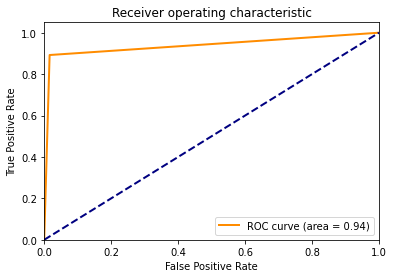

In [145]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict the probabilities of the positive class for the test set
y_score = clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [146]:
roc_auc = auc(fpr, tpr)
print("AUC score:", roc_auc)

AUC score: 0.9380675927845739


Here I have plotted the ROC curve for the final model and the AUC value for this is 94%

# Saving the model

In [147]:
import pickle

# Save the model to disk
filename = 'redwine_quality_analysis_model.pkl'
pickle.dump(dtc, open("redwine_quality_analysis_model.pkl", 'wb'))

we can predict the saved model with new dataset later 

In [148]:
# Load the saved model
with open('redwine_quality_analysis_model.pkl', 'rb') as file:
    model = pickle.load(file)
    
# Prediction
# Make predictions on the new data
predictions = model.predict(new_data)   